# 미니 프로젝트 : 가위바위보 분류기를 만들자

* 지난 시간 배운 내용을 바탕으로 가위바위보 분류기를 만들기

## 라이브러리 버전을 확인

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.19.0
1.26.4


## 데이터를 준비하자

1. 구글의 teachable machine 사이트접속 (https://teachablemachine.withgoogle.com/)
2. Image Project - Standard image model을 선택
3. Webcam을 구동해 클래스별 이미지 데이터를 직접 촬영해서 만들 수 있는 화면이 나타난다.
4. 딥러닝 모델이 인식하기 좋게끔 손이 잘 보이게 찍는다.
   * 여러 각도에서 찍어보세요.
   * 여러 크기로 찍어보세요.
   * 혼자하면 다양한 각도와 크기를 저장할 수 없으니, 옆 동료와 함께 하세요.
   * 좋은 데이터가 좋은 결과를 낳는다는 것을 꼭 기억하세요.
5. 가위바위보 데이터를 zip으로 받아 (scissor.zip, rock.zip, paper.zip)으로 저장하기
6. 디렉토리 만들기 데이터셋을 올릴 차례

## 데이터 불러오기 + Resize 하기

In [8]:
# PIL라이브러리 불러오기
from PIL import Image 
import glob
import os
import zipfile
from sklearn.utils import shuffle

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [3]:
# 압축 해제 함수
def unzip_data(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"{zip_path} 압축 해제 완료 → {extract_to}")

In [4]:
# 이미지 리사이즈 함수
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")  
    print(len(images), " images to be resized.")

    target_size = (28, 28)

    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.Resampling.LANCZOS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

In [5]:
# # 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# image_dir_path = "./scissor"
# resize_images(image_dir_path)

# print("가위 이미지 resize 완료!")

# image_dir_path = "./rock"
# resize_images(image_dir_path)

# print("바위 이미지 resize 완료!")

# image_dir_path = "./paper"
# resize_images(image_dir_path)

# print("보 이미지 resize 완료!")

In [6]:
# 예: 현재 노트북과 같은 폴더에 있는 zip 파일들
unzip_data("scissor.zip", "./scissor")
unzip_data("rock.zip", "./rock")
unzip_data("paper.zip", "./paper")

resize_images("./scissor")
resize_images("./rock")
resize_images("./paper")

scissor.zip 압축 해제 완료 → ./scissor
rock.zip 압축 해제 완료 → ./rock
paper.zip 압축 해제 완료 → ./paper
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [9]:
# 데이터 로딩 함수
def load_data(img_path, folder_names):
    img_size = 28
    color = 3

    label_map = {
        'scissor': 0, 'rock': 1, 'paper': 2,
        'scissor_test': 0, 'rock_test': 1, 'paper_test': 2,
        'scissor_test2': 0, 'rock_test2': 1, 'paper_test2': 2,
        'scissor1': 0, 'rock1': 1, 'paper1': 2
    }

    all_imgs = []
    all_labels = []

    for folder in folder_names:
        files = glob.glob(os.path.join(img_path, folder, '*.jpg'))
        label = label_map[folder]

        for file in files:
            try:
                img = Image.open(file).resize((img_size, img_size))
                img = np.array(img, dtype=np.int32)
                all_imgs.append(img)
                all_labels.append(label)
            except Exception as e:
                print(f"[오류] {file} 읽기 실패:", e)

    print('데이터의 이미지 개수:', len(all_imgs))
    return np.array(all_imgs), np.array(all_labels)

# 학습 데이터 로딩
(x_train, y_train) = load_data('.', ['scissor', 'rock', 'paper'])
x_train, y_train = shuffle(x_train, y_train, random_state=42)
x_train_norm = x_train / 255.0

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

데이터의 이미지 개수: 300
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  1


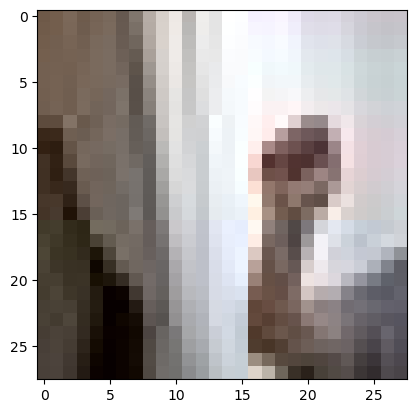

In [10]:
import matplotlib.pyplot as plt

plt.imshow(x_train[7])
print('라벨: ', y_train[7])

In [11]:
# 아래의 하이퍼파라미터는 예시입니다. 높은 인식률을 얻기 위해 하이퍼파라미터를 수정해 보세요.
import tensorflow as tf
from tensorflow import keras

n_channel_1 = 18
n_channel_2 = 36
n_dense = 20
n_train_epoch = 10

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(n_channel_2, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

C:\Users\nini\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 18)     │           504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 18)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 36)     │         5,868 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 36)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 900)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │        18,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,455 (95.53 KB)

 Trainable params: 24,455 (95.53 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2615 - loss: 1.1152
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3484 - loss: 1.0952
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3156 - loss: 1.0987 
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3491 - loss: 1.0986 
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3372 - loss: 1.0986 
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3283 - loss: 1.0986
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3012 - loss: 1.0987 
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3225 - loss: 1.0987 
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3363 - loss: 1.0986 
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3474 - loss: 1.0985 


## 친구의 데이터로 성능확인하기

In [13]:
# 예: 현재 노트북과 같은 폴더에 있는 zip 파일들 (주리님파일)
unzip_data("scissor1.zip", "./scissor1")
unzip_data("rock1.zip", "./rock1")
unzip_data("paper1.zip", "./paper1")

resize_images("./scissor1")
resize_images("./rock1")
resize_images("./paper1")

scissor1.zip 압축 해제 완료 → ./scissor1
rock1.zip 압축 해제 완료 → ./rock1
paper1.zip 압축 해제 완료 → ./paper1
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [14]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
(x_test, y_test) = load_data('.', ['scissor1', 'rock1', 'paper1'])
x_test_norm = x_test / 255.0

print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

데이터의 이미지 개수: 300
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [15]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss:", test_loss)
print("test_accuracy:", test_accuracy)

10/10 - 0s - 19ms/step - accuracy: 0.3333 - loss: 1.0986
test_loss: 1.0986242294311523
test_accuracy: 0.3333333432674408
